In [1]:
import numpy as np
import pandas as pd


In [5]:
ori = pd.read_excel("Input Streamlit v2.xlsx")
ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product Name      36 non-null     object
 1   Type              33 non-null     object
 2   Price             36 non-null     int64 
 3   Warranty (years)  36 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [6]:
new = pd.read_excel("Input Streamlit v3.xlsx")
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product Name      36 non-null     object 
 1   Type              33 non-null     object 
 2   Price             36 non-null     float64
 3   Warranty (years)  36 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.2+ KB


In [7]:
new.Price = new.Price.astype('int')

In [10]:
new.to_excel("Input Streamlit v3.xlsx", index=False)

In [11]:
import pandas as pd

# Sample data
data = {
    'Category': ['A', 'A', 'B', 'B', 'C'],
    'Value': [10, 20, 30, 40, 50]
}

df = pd.DataFrame(data)

# Merging cells in Excel
with pd.ExcelWriter('output.xlsx', engine='xlsxwriter') as writer:
    df.to_excel(writer, index=False, sheet_name='Sheet1')
    
    workbook  = writer.book
    worksheet = writer.sheets['Sheet1']

    # Merging cells in the 'Category' column for rows with the same category
    worksheet.merge_range('A2:A3', 'A')
    worksheet.merge_range('A4:A5', 'B')

    # Save the workbook
    writer.save()

print("Excel file created with merged cells.")


Excel file created with merged cells.


C:\Users\Zak\AppData\Local\Temp\ipykernel_17904\4104683695.py:23: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
c:\Users\Zak\anaconda3\lib\site-packages\xlsxwriter\workbook.py:369: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [12]:
import pandas as pd
from IPython.display import HTML

# Sample data
data = {
    'Category': ['A', 'A', 'B', 'B', 'C'],
    'Value': [10, 20, 30, 40, 50]
}

df = pd.DataFrame(data)

# Creating HTML with merged cells
def create_merged_html(df):
    html = '<table border="1">'
    previous_category = None
    for index, row in df.iterrows():
        html += '<tr>'
        
        # Handle the 'Category' column with merged cells
        if row['Category'] != previous_category:
            span = df['Category'].value_counts()[row['Category']]
            html += f'<td rowspan="{span}">{row["Category"]}</td>'
            previous_category = row['Category']
        
        # Add the 'Value' column
        html += f'<td>{row["Value"]}</td>'
        html += '</tr>'
    
    html += '</table>'
    return html

# Display the DataFrame with merged cells
HTML(create_merged_html(df))


In [3]:
import math
math.ceil(2.02)

3

In [6]:
import numpy as np
a = [3,2,1]
np.sum(a)

6

In [8]:
import pandas as pd

pd.DataFrame(a)

,0
0,3
1,2
2,1


In [10]:
for row, item in zip(a):
    print(row, item)

ValueError: not enough values to unpack (expected 2, got 1)

In [33]:
import numpy_financial as npf
import math

monthly_interest_rate = ((1+0.12)**(1/12))-1

LoanTerm_months = npf.nper(monthly_interest_rate, -400, 8000)
LoanTerm_months
# math.ceil(LoanTerm_months)

array(22.28325703)

In [34]:

total_payment_rounded = npf.pv(monthly_interest_rate, LoanTerm_months, -400, -1)
total_payment_rounded

8000.810224141311

In [39]:
npf.fv(monthly_interest_rate, LoanTerm_months, -400, 8000)

3.637978807091713e-12

In [36]:
LoanTerm_months * 400

8913.302810573141

In [42]:
import numpy_financial as npf
import math

# Given values
pv = 8000  # Present Value (Loan amount)
monthly_interest_rate = ((1 + 0.12) ** (1 / 12)) - 1  # Monthly interest rate based on annual rate of 12%
pmt = -400  # Monthly payment (negative because it's an outflow)

# Step 1: Calculate the exact number of periods (can be a float)
nper_exact = npf.nper(monthly_interest_rate, pmt, pv)

# Step 2: Round up the number of periods to the nearest whole number
nper_rounded = math.ceil(nper_exact)

# Step 3: Calculate the remaining balance after making nper_rounded - 1 payments
remaining_balance = npf.fv(monthly_interest_rate, nper_rounded - 1, pmt, pv)

# Step 4: Calculate the final payment to settle the remaining balance
final_payment = remaining_balance * (1 + monthly_interest_rate)

# Output the results
print(f"Exact number of periods: {nper_exact}")
print(f"Rounded number of periods: {nper_rounded}")
print(f"Regular monthly payment: ${-pmt:.2f}")
print(f"Final payment to settle the loan: ${-final_payment:.2f}")


Exact number of periods: 22.283257026432853
Rounded number of periods: 23
Regular monthly payment: $400.00
Final payment to settle the loan: $113.69


In [41]:
import numpy_financial as npf
import math

# Given values
pv = 8000  # Present Value (Loan amount)
monthly_interest_rate = ((1 + 0.12) ** (1 / 12)) - 1  # Monthly interest rate based on an annual rate of 12%
pmt = -400  # Monthly payment (negative because it's an outflow)

# Step 1: Calculate the exact number of periods (can be a float)
nper_exact = npf.nper(monthly_interest_rate, pmt, pv)

# Step 2: Round up the number of periods to the nearest whole number
nper_rounded = math.ceil(nper_exact)

# Step 3: Calculate the remaining balance after making nper_rounded - 1 payments
remaining_balance = npf.fv(monthly_interest_rate, nper_rounded - 1, pmt, pv)

# Step 4: Calculate the final payment to settle the remaining balance
final_payment = remaining_balance * (1 + monthly_interest_rate)

# Step 5: Calculate the total payment using the exact number of periods
total_payment_exact = pmt * nper_exact

# Step 6: Calculate the total payment using the rounded number of periods
total_payment_rounded = (pmt * (nper_rounded - 1)) + final_payment

# Output the results
print(f"Exact number of periods: {nper_exact}")
print(f"Rounded number of periods: {nper_rounded}")
print(f"Regular monthly payment: ${-pmt:.2f}")
print(f"Final payment to settle the loan: ${-final_payment:.2f}")
print(f"Total payment using exact periods: ${-total_payment_exact:.2f}")
print(f"Total payment using rounded periods: ${-total_payment_rounded:.2f}")

Exact number of periods: 22.283257026432853
Rounded number of periods: 23
Regular monthly payment: $400.00
Final payment to settle the loan: $113.69
Total payment using exact periods: $8913.30
Total payment using rounded periods: $8913.69


In [3]:
import numpy_financial as npf
import math

monthly_interest_rate = ((1 + 0.12) ** (1 / 12)) - 1  # Monthly interest rate based on an annual rate of 12%

npf.nper(monthly_interest_rate, -150, 1484,1)

array(10.44489061)

In [5]:

monthly_interest_rate *100

0.9488792934583046

In [ ]:
import pandas as pd

# Loan parameters
principal = 200000  # Principal loan amount
annual_rate = 12  # Annual interest rate in percent
loan_term_years = 30  # Loan term in years

# Convert APR to a monthly interest rate
monthly_rate = (annual_rate / 100) / 12  # Convert percentage to decimal and divide by 12 for monthly rate
total_payments = loan_term_years * 12  # Total number of monthly payments

# Calculate fixed monthly payment using the amortization formula
monthly_payment = principal * (monthly_rate * (1 + monthly_rate) ** total_payments) / ((1 + monthly_rate) ** total_payments - 1)

# Initialize variables for the loop
remaining_principal = principal
ratios = []

# Calculate interest and principal for each month
for month in range(1, total_payments + 1):
    interest_payment = remaining_principal * monthly_rate
    principal_payment = monthly_payment - interest_payment
    ratio_interest_principal = interest_payment / principal_payment
    ratios.append({
        'Month': month,
        'Interest Payment': interest_payment,
        'Principal Payment': principal_payment,
        'Interest/Principal Ratio': ratio_interest_principal
    })
    
    # Update remaining principal
    remaining_principal -= principal_payment

# Create DataFrame
df = pd.DataFrame(ratios)

# Display the DataFrame
print(df)


In [6]:
import pandas as pd
import numpy_financial as npf

# Loan parameters
principal = 200000  # Principal loan amount
annual_rate = 12  # Annual interest rate in percent
loan_term_years = 30  # Loan term in years

# Convert APR to a monthly interest rate
monthly_rate = (annual_rate / 100) / 12  # Convert percentage to decimal and divide by 12 for monthly rate

monthly_rate  = ((1+(annual_rate/100))**(1/12))-1
total_payments = loan_term_years * 12  # Total number of monthly payments

# Calculate fixed monthly payment
monthly_payment = npf.pmt(rate=monthly_rate, nper=total_payments, pv=-principal)
print(monthly_payment)

# Initialize list for storing results
ratios = []

# Calculate interest and principal portions for each month
for month in range(1, total_payments + 1):
    interest_payment = npf.ipmt(rate=monthly_rate, per=month, nper=total_payments, pv=-principal)
    principal_payment = npf.ppmt(rate=monthly_rate, per=month, nper=total_payments, pv=-principal)
    ratio_interest_principal = interest_payment / principal_payment
    ratios.append({
        'Month': month,
        'Interest Payment': interest_payment,
        'Principal Payment': principal_payment,
        'Interest/Principal Ratio': ratio_interest_principal
    })

# Create DataFrame
df = pd.DataFrame(ratios)

# Display the DataFrame
print(df)


1963.289101086958
     Month    Interest Payment  Principal Payment  Interest/Principal Ratio
0        1  1897.7585869166091          65.530514                 28.959922
1        2    1897.13678143675          66.152320                 28.678311
2        3  1896.5090757734467          66.780025                 28.399346
3        4  1895.8754139410805          67.413687                 28.123004
4        5  1895.2357394227968          68.053362                 27.849260
..     ...                 ...                ...                       ...
355    356    90.5522942020241        1872.736807                  0.048353
356    357   72.78228242051688        1890.506819                  0.038499
357    358    54.8436546767767        1908.445446                  0.028737
358    359   36.73481100883342        1926.554290                  0.019068
359    360  18.454136273053965        1944.834965                  0.009489

[360 rows x 4 columns]


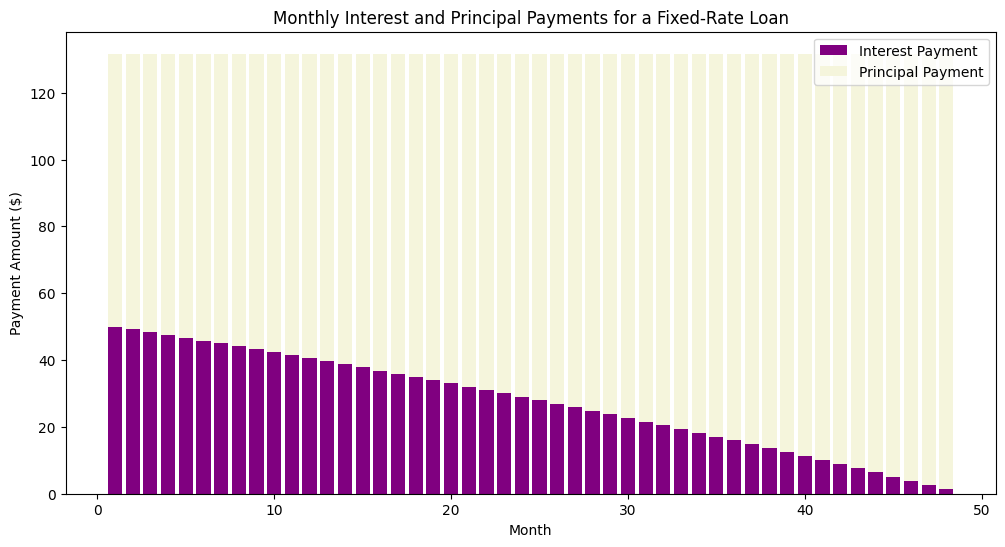

In [4]:
import pandas as pd
import numpy_financial as npf
import matplotlib.pyplot as plt

# Loan parameters
principal = 5000  # Principal loan amount
annual_rate = 12  # Annual interest rate in percent
loan_term_years = 4  # Loan term in years

# Convert APR to a monthly interest rate
monthly_rate = (annual_rate / 100) / 12  # Convert percentage to decimal and divide by 12 for monthly rate
total_payments = loan_term_years * 12  # Total number of monthly payments

# Calculate fixed monthly payment
monthly_payment = npf.pmt(rate=monthly_rate, nper=total_payments, pv=-principal)

# Initialize list for storing results
ratios = []

# Calculate interest and principal portions for each month
for month in range(1, total_payments + 1):
    interest_payment = npf.ipmt(rate=monthly_rate, per=month, nper=total_payments, pv=-principal)
    principal_payment = npf.ppmt(rate=monthly_rate, per=month, nper=total_payments, pv=-principal)
    ratios.append({
        'Month': month,
        'Interest Payment': interest_payment,
        'Principal Payment': principal_payment
    })

# Create DataFrame
df = pd.DataFrame(ratios)

# Plotting the stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(df['Month'], df['Interest Payment'], label='Interest Payment', color='purple')
plt.bar(df['Month'], df['Principal Payment'], bottom=df['Interest Payment'], label='Principal Payment', color='beige')

plt.title('Monthly Interest and Principal Payments for a Fixed-Rate Loan')
plt.xlabel('Month')
plt.ylabel('Payment Amount ($)')
plt.legend()
plt.show()


In [31]:
import pandas as pd
import numpy_financial as npf
import plotly.graph_objects as go

def loan_amortization_plot(principal, annual_rate, loan_term_years):
    """
    Function to calculate loan amortization schedule and plot it using Plotly.
    
    Parameters:
    principal (float): Principal loan amount.
    annual_rate (float): Annual interest rate in percent.
    loan_term_years (int): Loan term in years.

    Returns:
    fig (plotly.graph_objs._figure.Figure): Plotly figure object representing the loan amortization schedule.
    """
    # Convert APR to a monthly interest rate
    monthly_rate = (annual_rate / 100) / 12  # Convert percentage to decimal and divide by 12 for monthly rate
    total_payments = loan_term_years * 12  # Total number of monthly payments

    # Calculate fixed monthly payment
    monthly_payment = npf.pmt(rate=monthly_rate, nper=total_payments, pv=-principal)

    # Initialize list for storing results
    ratios = []

    # Calculate interest and principal portions for each month
    for month in range(1, total_payments + 1):
        interest_payment = npf.ipmt(rate=monthly_rate, per=month, nper=total_payments, pv=-principal)
        principal_payment = npf.ppmt(rate=monthly_rate, per=month, nper=total_payments, pv=-principal)
        ratios.append({
            'Month': month,
            'Interest Payment': interest_payment,
            'Principal Payment': principal_payment
        })

    # Create DataFrame
    df = pd.DataFrame(ratios)

    # Determine figure size dynamically based on number of data points
    width = 600 if total_payments <= 12 else 40 * total_payments
    height = 600 if total_payments <= 12 else 700

    # Create stacked bar chart using Plotly
    fig = go.Figure()

    # Add interest payment bar
    fig.add_trace(go.Bar(
        x=df['Month'],
        y=df['Interest Payment'],
        name='Interest Payment',
        marker_color='purple',
        hovertext=[f"Interest Payment: ${interest:.2f}" for month, interest in zip(df['Month'], df['Interest Payment'])],
        hoverinfo='text'
    ))

    # Add principal payment bar
    fig.add_trace(go.Bar(
        x=df['Month'],
        y=df['Principal Payment'],
        name='Principal Payment',
        marker_color='beige',
        hovertext=[f"Month: {month}<br>Principal Payment: ${principal:.2f}" for month, principal in zip(df['Month'], df['Principal Payment'])],
        hoverinfo='text'
    ))

    # Update layout for better visualization
    fig.update_layout(
        title='Monthly Interest and Principal Payments for a Fixed-Rate Loan',
        xaxis_title='Month',
        yaxis_title='Payment Amount ($)',
        barmode='stack',
        legend=dict(x=0.01, y=0.99),
        width=width,
        height=height,
        hovermode='x unified',  # This setting will show hover info for all data points at the same x-value
    )

    return fig



In [32]:


# Example usage
principal = 5000
annual_rate = 12
loan_term_years = 2

fig = loan_amortization_plot(principal, annual_rate, loan_term_years)
fig.show()


In [73]:
import pandas as pd
import numpy_financial as npf
import plotly.graph_objects as go
import math

def loan_amortization_custom_payment(principal, annual_rate, monthly_payment):
    """
    Function to calculate loan amortization schedule based on a fixed monthly payment using Plotly.
    
    Parameters:
    principal (float): Principal loan amount.
    annual_rate (float): Annual interest rate in percent.
    monthly_payment (float): Fixed monthly payment.

    Returns:
    fig (plotly.graph_objs._figure.Figure): Plotly figure object representing the loan amortization schedule.
    """
    # Convert APR to a monthly interest rate
    monthly_rate = (annual_rate / 100) / 12  # Convert percentage to decimal and divide by 12 for monthly rate

    # Calculate the loan term in months (can be a decimal)
    loan_term_months = npf.nper(rate=monthly_rate, pmt=-monthly_payment, pv=principal)
    
    # Round up to the nearest whole number of months
    loan_term_months_rounded = math.ceil(loan_term_months)
    print(loan_term_months_rounded)

    # Calculate the remaining balance after making loan_term_months_rounded - 1 payments
    remaining_balance = npf.fv(rate=monthly_rate, nper=loan_term_months_rounded - 1, pmt=-monthly_payment, pv=principal)
    print(remaining_balance)
    
    # Calculate the final payment to settle the remaining balance
    final_payment = -(remaining_balance * (1 + monthly_rate))
    
    print(final_payment)

    # Initialize list for storing results
    ratios = []

    # Calculate interest and principal portions for each month
    for month in range(1, loan_term_months_rounded + 1):
        if month == loan_term_months_rounded:
            # Use the final payment for the last month
            interest_payment = npf.ipmt(rate=monthly_rate, per=month, nper=loan_term_months_rounded, pv=-principal)
            principal_payment = final_payment - interest_payment
        else:
            interest_payment = npf.ipmt(rate=monthly_rate, per=month, nper=loan_term_months_rounded, pv=-principal)
            principal_payment = monthly_payment - interest_payment
        
        # Append results for each month
        ratios.append({
            'Month': month,
            'Interest Payment': interest_payment,
            'Principal Payment': principal_payment,
            'Total Payment': principal_payment + interest_payment
        })

    # Create DataFrame
    df = pd.DataFrame(ratios)

    # Print the DataFrame for debugging
    print(df)

    # Determine figure size dynamically based on number of data points
    width = 600 if loan_term_months_rounded <= 12 else 40 * loan_term_months_rounded
    height = 600 if loan_term_months_rounded <= 12 else 700

    # Create stacked bar chart using Plotly
    fig = go.Figure()

    # Add interest payment bar
    fig.add_trace(go.Bar(
        x=df['Month'],
        y=df['Interest Payment'],
        name='Interest Payment',
        marker_color='purple',
        hovertext=[f"Month: {month}<br>Interest Payment: ${interest:.2f}" for month, interest in zip(df['Month'], df['Interest Payment'])],
        hoverinfo='text'
    ))

    # Add principal payment bar
    fig.add_trace(go.Bar(
        x=df['Month'],
        y=df['Principal Payment'],
        name='Principal Payment',
        marker_color='beige',
        hovertext=[f"Month: {month}<br>Principal Payment: ${principal:.2f}" for month, principal in zip(df['Month'], df['Principal Payment'])],
        hoverinfo='text'
    ))

    # Update layout for better visualization
    fig.update_layout(
        title='Monthly Interest and Principal Payments for a Fixed-Rate Loan with Custom Monthly Payment',
        xaxis_title='Month',
        yaxis_title='Payment Amount ($)',
        barmode='stack',
        legend=dict(x=0.01, y=0.99),
        width=width,
        height=height,
        hovermode='x unified',  # This setting will show hover info for all data points at the same x-value
    )

    return fig




In [77]:
# Example usage
principal = 2077.23
annual_rate = 12
monthly_payment = 200

fig = loan_amortization_custom_payment(principal, annual_rate, monthly_payment)
fig.show()

12
-4.132826437264612
4.174154701637258
    Month    Interest Payment  Principal Payment  Total Payment
0       1             20.7723         179.227700     200.000000
1       2   19.13442930693688         180.865571     200.000000
2       3  17.480179906943135         182.519820     200.000000
3       4  15.809388012949427         184.190612     200.000000
4       5  14.121888200015825         185.878112     200.000000
5       6  12.417513388952846         187.582487     200.000000
6       7  10.696094829779259         189.303905     200.000000
7       8    8.95746208501395         191.042538     200.000000
8       9    7.20144301280096         192.798557     200.000000
9      10   5.427863749865878         194.572136     200.000000
10     11   3.636548694301414         196.363451     200.000000
11     12  1.8273204881813125           2.346834       4.174155


In [6]:
# negate the value of True so it will return False
a = True

In [7]:
# return False given a = True 
print(not a)

-1